### First Neural Network - For handwritten Digit classification

In [1]:
! /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 MB 521.6 kB/s eta 0:00:0000:0100:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 698.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 575.3 kB/s eta 0:00:00a 0:00:01
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━

In [88]:
# import dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
x,y = mnist["data"],mnist["target"]


In [89]:
X_train = x.iloc[:60000]
f = X_train
X_test = x.iloc[60000:]
Y_train = y.iloc[:60000].astype(int)
Y_test = y.iloc[60000:].astype(int)

In [90]:
#scaling the features
X_train = X_train/255


In [91]:
import tensorflow as tf
from tensorflow import keras


In [92]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.fit(X_train,Y_train,epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.8771 - loss: 0.4715
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9151 - loss: 0.3041
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.9209 - loss: 0.2837
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9240 - loss: 0.2732
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - accuracy: 0.9255 - loss: 0.2665
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.9279 - loss: 0.2617
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9285 - loss: 0.2581
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.9292 - loss: 0.2554
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.9295 - loss: 0.2532
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.9309 - loss: 0.2510


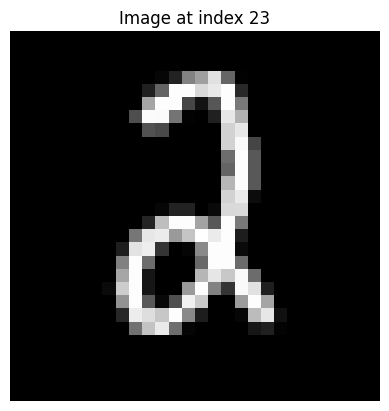

In [94]:
import matplotlib.pyplot as plt

img = X_test.iloc[2112].values.reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.title("Image at index 23")
plt.axis('off')
plt.show()

In [95]:
#prediction on test dataset
s = X_test.iloc[2112].values.reshape(1, 784)
prediction = model.predict(s)
prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.5945576e-34, 0.0000000e+00,
        7.4921203e-10, 0.0000000e+00]], dtype=float32)

In [96]:
import numpy as np

predicted_class = np.argmax(prediction)
print(predicted_class)

2


In [97]:
# Adding Hidden Layers into the model

optimised_model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


optimised_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
optimised_model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - accuracy: 0.9221 - loss: 0.2723
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9627 - loss: 0.1261
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.9737 - loss: 0.0884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9795 - loss: 0.0669
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.9834 - loss: 0.0532


In [99]:
# Adding More Hidden Layers into the model

more_optimised_model = keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(300,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


more_optimised_model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

    )



/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
more_optimised_model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0321
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0297
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9926 - loss: 0.0235
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9929 - loss: 0.0219
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0209
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0187
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0157
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0177
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0137
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9957 - loss: 0.0139
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9962 - loss: 0.0142
Epoch 12/15
1875/1875 ━━━━━━━━

In [109]:
#printing confusion matrix for all three models

model_predictions = model.predict(X_test)
optimised_model_predictions = optimised_model.predict(X_test)
more_optimised_model_predictions = more_optimised_model.predict(X_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


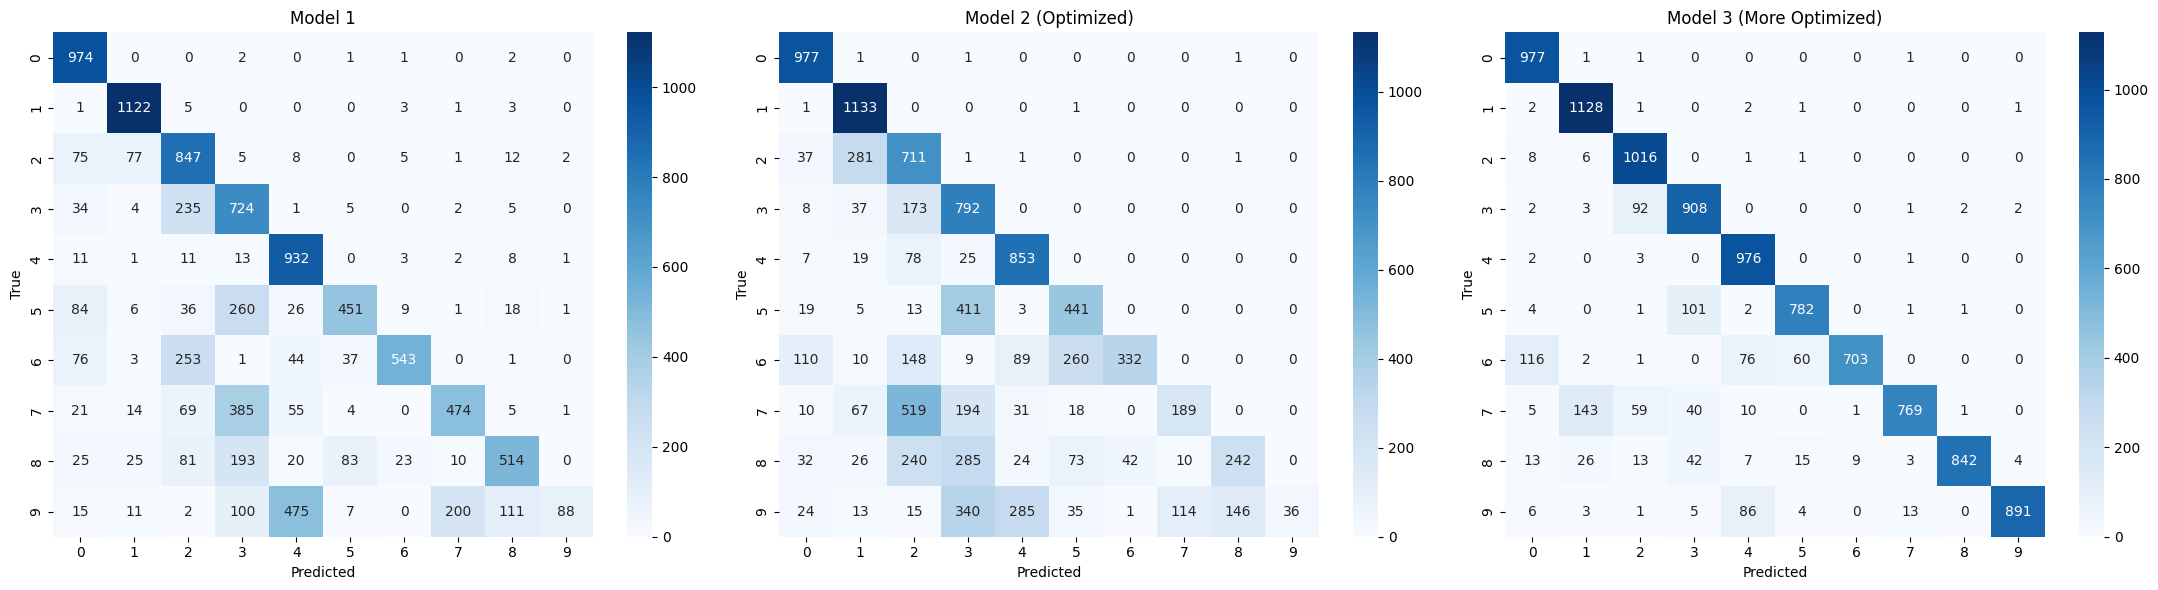

In [110]:
# =====================================
# 1. Import Libraries
# =====================================
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# =====================================
# 2. Convert predictions to class labels
# (Only needed if predictions are probabilities)
# =====================================

# If your predictions look like [[0.1, 0.02, ...]] use argmax
if len(model_predictions.shape) > 1:
    model_predictions = np.argmax(model_predictions, axis=1)

if len(optimised_model_predictions.shape) > 1:
    optimised_model_predictions = np.argmax(optimised_model_predictions, axis=1)

if len(more_optimised_model_predictions.shape) > 1:
    more_optimised_model_predictions = np.argmax(more_optimised_model_predictions, axis=1)

# =====================================
# 3. Compute Confusion Matrices
# =====================================
cm1 = confusion_matrix(Y_test, model_predictions)
cm2 = confusion_matrix(Y_test, optimised_model_predictions)
cm3 = confusion_matrix(Y_test, more_optimised_model_predictions)

# =====================================
# 4. Plot All 3 Confusion Matrices Side-by-Side
# =====================================
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

cms = [cm1, cm2, cm3]
titles = ['Model 1', 'Model 2 (Optimized)', 'Model 3 (More Optimized)']

for ax, cm, title in zip(axes, cms, titles):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()